2.765954317985812
2.785471660087489


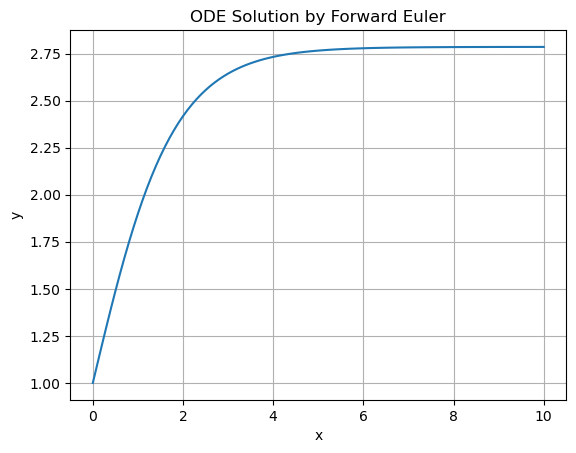

In [66]:
import math
import numpy as np
from matplotlib import pyplot as plt

def f_x_y(x, y):
    return y / (math.e ** x)

def forward_euler(x0, y0, delta_x, n): 
    #solve dy/dx = f(x, y), x(0) = x0, y(0) = y0, delta_x = change in x, n = num steps
    x_list = [x0]
    y_list = [y0]
    x = x0
    y = y0
    for i in range(n):
        y += delta_x * f_x_y(x, y)
        x += delta_x
        x_list.append(x)
        y_list.append(y)
    print(y_list[-1])
    return x_list, y_list

def forward_euler_plot(x0, y0, delta_x, n):
    x_values, y_values = forward_euler(x0, y0, delta_x, n)
     # = forward_euler(f_x_y(x,y), x0, y0, delta_x, n)[1]

    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('ODE Solution by Forward Euler')
    plt.grid(True)
    plt.show

forward_euler(0, 1, 0.1, 50)
forward_euler_plot(0, 1, 0.1, 100)

#CHECKED √

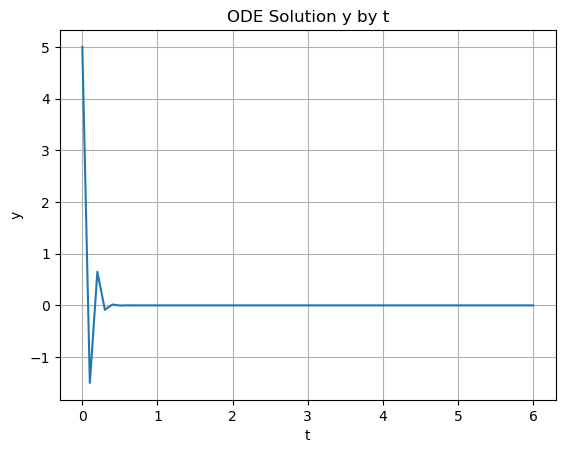

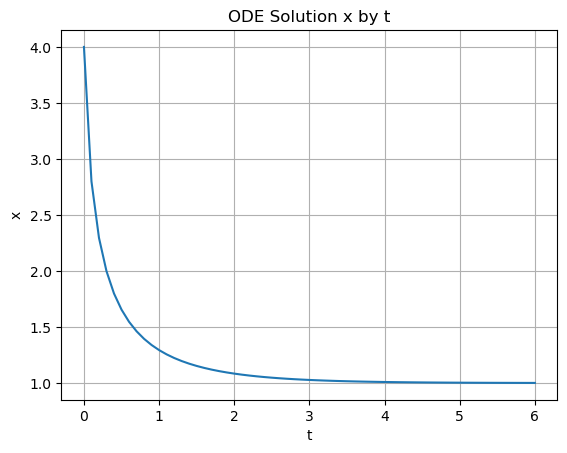

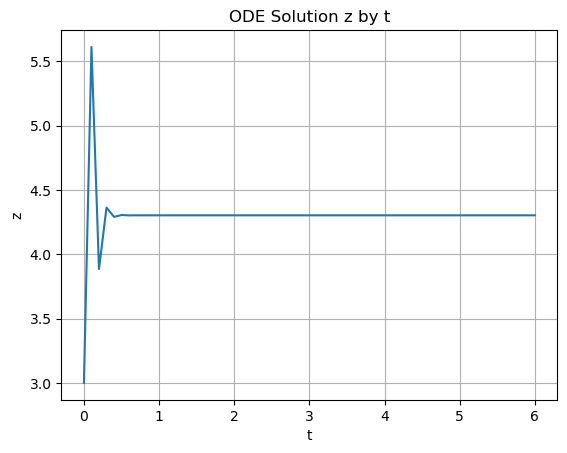

In [68]:
import math
import numpy as np
from matplotlib import pyplot as plt

def f_dx_dt(x, y, z, t):
    return x * (1 - x)

def f_dy_dt(x, y, z, t):
    return y * (1 - y) - 3 * y * z

def f_dz_dt(x, y, z, t):
    return 2.94 * math.e ** (-0.2) * y * z - 2 * y

def forward_euler_system(x0, y0, z0, delta_t, n):
    #solve dy/dt = f(x, y, z, t), dx/dt = f(x, y, z, t), dz/dt = f(x, y, z, t), x(0) = x0, y(0) = y0, z(0) = z0

    t = 0
    t_list = [t]

    y = y0
    y_list = [y]

    x = x0
    x_list = [x]

    z = z0
    z_list = [z]

    for i in range(n):
        t += delta_t
        t_list.append(t)

        new_y = y + delta_t * f_dy_dt(x, y, z, t)
        y_list.append(new_y)

        new_x = x + delta_t * f_dx_dt(x, y, z, t)
        x_list.append(new_x)

        new_z = z + delta_t * f_dz_dt(x, y, z, t)
        z_list.append(new_z)
        
        y = new_y
        x = new_x
        z = new_z

    return t_list, x_list, y_list, z_list

def forward_euler_system_plot(x0, y0, z0, delta_t, n):
    t_values, x_values, y_values, z_values = forward_euler_system(x0, y0, z0, delta_t, n)
    #graph forward euler system

    plt.plot(t_values, y_values)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('ODE Solution y by t')
    plt.grid(True)
    plt.show()

    plt.plot(t_values, x_values)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('ODE Solution x by t')
    plt.grid(True)
    plt.show()

    plt.plot(t_values, z_values)
    plt.xlabel('t')
    plt.ylabel('z')
    plt.title('ODE Solution z by t')
    plt.grid(True)
    plt.show()

#print(forward_euler_system(4, 5, 3, 0.5, 150))
forward_euler_system_plot(4, 5, 3, 0.1, 60)

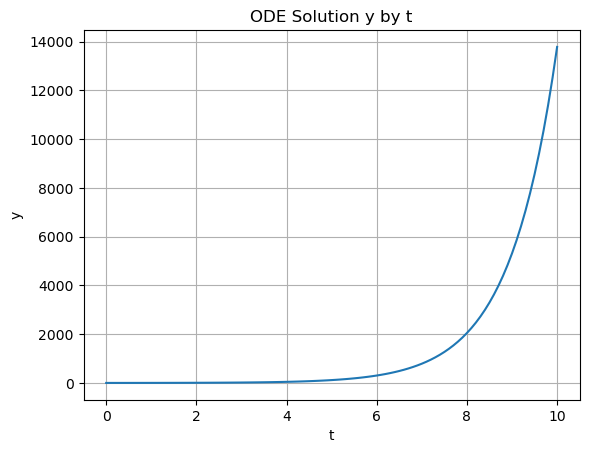

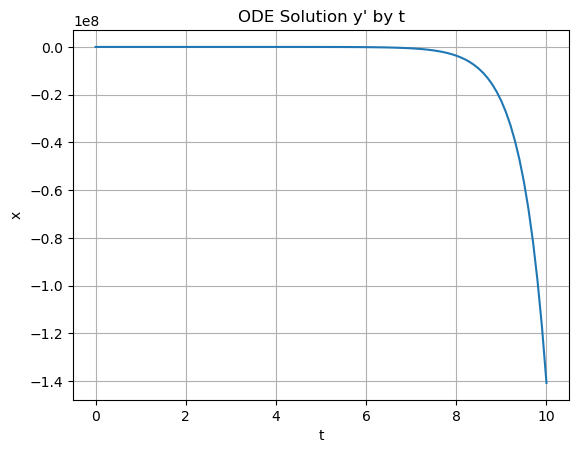

In [70]:
import math
import numpy as np
from matplotlib import pyplot as plt

def f_dy2_dt2(t, y, dy_dt):
    return -2 * dy_dt + 2 * y + t

def forward_euler_system_2nd(y0, dy0, delta_t, n):
    #solve dy^2/dt^2 = f(t, y, dy/dt) y(0) = y0, dy/dt(0) = dy0

    #solve dy/dt = x, dx/dt = f(y, x, t), y(0) = y0, x(0) = dy0

    def f_dy_dt(y, x, t):
        return x

    def f_dx_dt(y, x, t):
        return f_dy2_dt2(t, y, x)
    
    t = 0
    t_list = [t]

    y = y0
    y_list = [y]

    x0 = dy0
    x = x0
    x_list = [x]

    for i in range(n):
        t += delta_t
        t_list.append(t)

        new_y = y + delta_t * f_dy_dt(x, y, t)
        y_list.append(new_y)

        new_x = x + delta_t * f_dx_dt(x, y, t)
        x_list.append(new_x)
        
        y = new_y
        x = new_x

    return t_list, x_list, y_list

def forward_euler_system_2nd_plot(y0, dy0, delta_t, n):
    t_values, x_values, y_values = forward_euler_system_2nd(y0, dy0, delta_t, n)
    #graph forward euler system

    plt.plot(t_values, y_values)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('ODE Solution y by t')
    plt.grid(True)
    plt.show()

    plt.plot(t_values, x_values)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title("ODE Solution y' by t")
    plt.grid(True)
    plt.show()

#forward_euler_system_2nd(1, 0, 0.1, 100)
forward_euler_system_2nd_plot(1, 0, 0.1, 100)

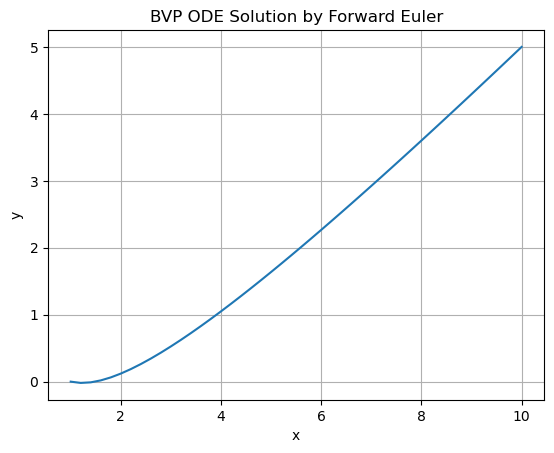

In [72]:
import math
import numpy as np
from  matplotlib import pyplot as plt

def f_dy2_dx2(x):
    return x ** -2

def bvp_euler(y0, x0, yn, xn, delta_x):
    #solve dy^2/d^2x = f(x), y(0) = y0, y(xn) = yn, step size delta_x
    n = int((xn - x0)/delta_x) + 1
    
    x_values = np.linspace(x0, xn, n)

    #matrix_a * matrix_b = matrix_c
    matrix_a = np.zeros((n, n)) 
    matrix_a[0,0] = 1
    matrix_a[n-1,n-1] = 1
    
    for i in range(1, n-1):
        matrix_a[i,i] = -2 * delta_x ** (-2) 
        matrix_a[i,i-1] = delta_x ** (-2)
        matrix_a[i,i+1] = delta_x ** (-2)

    matrix_c = np.zeros(n)
    matrix_c[0] = y0
    matrix_c[n-1] = yn
    for i in range(1, n-1):
        matrix_c[i] = f_dy2_dx2(x_values[i])
    
    y_values = np.linalg.solve(matrix_a, matrix_c)
    
    return x_values, y_values

def bvp_euler_plot(y0, x0, yn, xn, delta_x):
    x_values, y_values = bvp_euler(y0, x0, yn, xn, delta_x)
     # = forward_euler(f_x_y(x,y), x0, y0, delta_x, n)[1]

    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('BVP ODE Solution by Forward Euler')
    plt.grid(True)
    plt.show()

bvp_euler_plot(0, 1, 5, 10, 0.2)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0, 10, 100)
y = math.e ** (1 - math.e ** (-x))
 
fig = plt.figure(figsize = (10, 5))

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("ODE Analytical Solution")
plt.grid(True)
plt.show()

x = np.linspace(0, 10, 100)
y = ((4 * math.sqrt(3) + 9) * math.e ** (math.sqrt(3) * x - x) - (4 * math.sqrt(3) - 9) * math.e ** (-math.sqrt(3) * x - x)) / 12 - (x + 1) / 2
 
fig = plt.figure(figsize = (10, 5))

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("ODE Analytical Solution")
plt.grid(True)
plt.show()